# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 0: The admin stuff 
### (Why we use "Peer Evaluations"-Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch the video :)

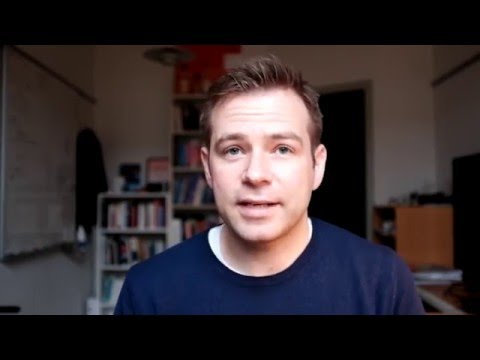

In [92]:
from IPython.display import YouTubeVideo
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

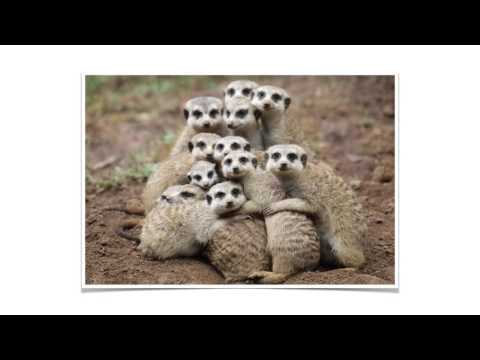

In [93]:
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> 

<h3>Ans.<h3>

1. The random networks estimate that the maximum number of theirselves' aquiantances will have approximately 1,185. However, it is obvious wrong since there were some people's facebook friends reached up to 5000. \
<br>
2. 
- Subcritical Regime: $0 < \langle k \rangle < 1$
- Critical Point: $\langle k \rangle = 1$
- Supercritical Regime: $\langle k \rangle > 1$
- Connected Regime: $\langle k \rangle > \ln N$  

<br>
3. For fixed ‹k›, the larger the network, the smaller is a node’s clustering coefficient. Consequently a node's local clustering coefficient Ci is expected to decrease as 1/N.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

<h3>Ans.<h3>

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np

**1.**

In [95]:
N = 500
k = 4
p0 = 0.0
p01 = 0.1
p1 = 1.0

P0 = nx.watts_strogatz_graph(N, k, p0)
P01 = nx.watts_strogatz_graph(N, k, p01)
P1 = nx.watts_strogatz_graph(N, k, p1)

print('d_p(0.0) : {:.4f}'.format(nx.average_shortest_path_length(P0)))
print('d_p(0.1) : {:.4f}'.format(nx.average_shortest_path_length(P01)))
print('d_p(1.0) : {:.4f}'.format(nx.average_shortest_path_length(P1)))

d_p(0.0) : 62.8758
d_p(0.1) : 7.3128
d_p(1.0) : 4.7102


**2.**
 For p = 1 all links have been rewired, so the network turns into a random network.

<h4>3.Compare to fully randomized network?<h4>

In [96]:
N = 500
k = 4
p = [0.0, 0.01, 0.03, 0.05, 0.1, 0.2]
average = [0.0] * 6
std_dev = [0.0] * 6

for j in range(len(p)):
    
    p_each = [0.0] * 50 
    
    for i in range(50):
        G = nx.watts_strogatz_graph(N, k, p[j])
        p_each[i] = nx.average_shortest_path_length(G)
    
    average[j] = sum(p_each)/50
    std_dev[j] = np.std(p_each)
    

print('d_p(0.0): {:.4f}'.format(average[0]))
print('d_p(0.01): {:.4f}'.format(average[1])) 
print('d_p(0.03): {:.4f}'.format(average[2])) 
print('d_p(0.05): {:.4f}'.format(average[3]))
print('d_p(0.1): {:.4f}'.format(average[4])) 
print('d_p(0.2): {:.4f}'.format(average[5])) 

KeyboardInterrupt: 

In [ ]:
print('std_dev(0.0): {:.4f}'.format(std_dev[0]))
print('std_dev(0.01): {:.4f}'.format(std_dev[1]))
print('std_destd_dev(0.03): {:.4f}'.format(std_dev[2]))
print('std_dev(0.05): {:.4f}'.format(std_dev[3]))
print('std_dev(0.1): {:.4f}'.format(std_dev[4]))
print('std_dev(0.2): {:.4f}'.format(std_dev[5]))

std_dev(0.0): 0.0000
std_dev(0.01): 4.4148
std_destd_dev(0.03): 1.2508
std_dev(0.05): 0.6871
std_dev(0.1): 0.2781
std_dev(0.2): 0.1120


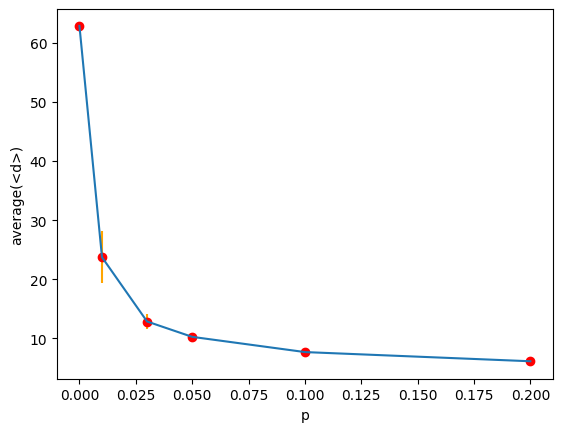

In [ ]:
#plot part 
plt.errorbar(p, average, yerr=std_dev, ecolor='orange')
for d in range(len(p)):
    plt.plot(p[d], average[d], 'ro')
plt.xlabel("p")
plt.ylabel("average(<d>)")
plt.show()

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

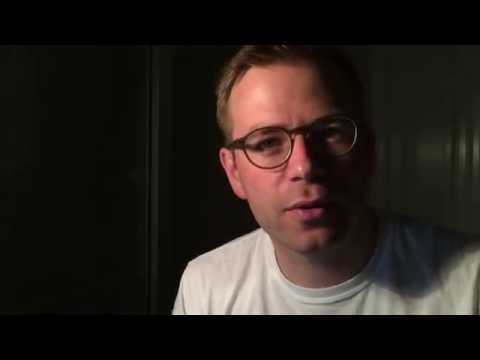

In [ ]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)
> 

In [ ]:
import random

In [ ]:
def barabasi_albert_graph(n, m, seed=None):
    """Returns a random graph according to the Barabási–Albert preferential
    Attachment model.
 
    A graph of ``n`` nodes is grown by attaching new nodes each with ``m``
    Edges that are preferentially attached to existing nodes with high degree.
 
    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : int, optional
        Seed for random number generator (default=None).
 
    Returns
    -------
    G : Graph
 
    Raises
    ------
    NetworkXError
        If ``m`` does not satisfy ``1 <= m < n``. """
        
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási-Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
        
    if seed is not None:
        random.seed(seed)
 
    # Add m initial nodes (m0 in barabasi-speak)
    G=nx.empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = random.choice(repeated_nodes,m)
        source += 1
    return G

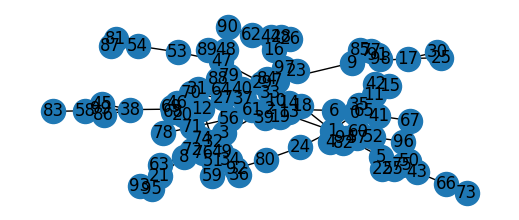

In [ ]:
G = nx.barabasi_albert_graph(100, 1)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
#5000 nodes
G_5000 = nx.barabasi_albert_graph(5000, 1)

In [ ]:
#max, min
def max_degree(graph):
    """
    :param graph: non-null and non-oriented networkx type graph to analyze.
    :return: list of nodes of this graph with maximum degree; 0 if the graph has no nodes; -1 if the graph is disconnected;
    """
    if len(graph.nodes) == 0:
        return 0
    if not nx.is_connected(graph):
        return -1
    
    max_grade = max(graph.degree, key=lambda x: x[1])[1]

    return max_grade

def min_degree(graph):
    if len(graph.nodes) == 0:
        return 0
    if not nx.is_connected(graph):
        return -1
    
    min_grade = min(graph.degree, key=lambda x: x[1])[1]

    return min_grade

In [ ]:
print("Maximum degree: ", max_degree(G_5000))
print("Minimum degree: ", min_degree(G_5000))

Maximum degree:  205
Minimum degree:  1


In [ ]:
hist,bins = np.histogram(G_5000.degree,bins = 'auto') 
print(hist)
print(bins)

[5228  227  227  227  228  227  227  227  228  227  227  227  227  228
  227  227  227  228  227  227  227  228]
[   0.          227.22727273  454.45454545  681.68181818  908.90909091
 1136.13636364 1363.36363636 1590.59090909 1817.81818182 2045.04545455
 2272.27272727 2499.5        2726.72727273 2953.95454545 3181.18181818
 3408.40909091 3635.63636364 3862.86363636 4090.09090909 4317.31818182
 4544.54545455 4771.77272727 4999.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


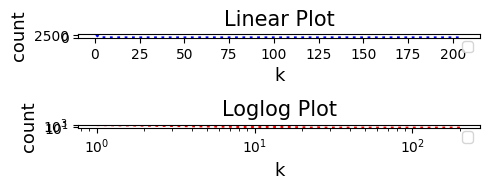

In [ ]:
from collections import Counter

G_d = dict(G_5000.degree)

#G_d.values()
G_collect = Counter(G_d.values())

#print(G_collect)

G_list = sorted(G_collect.items())

x, y = zip(*G_list) 

# Creating figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[7, 11])

# Plotting the graph without using loglog
ax1.plot(x, y, ':b', linewidth=2)
ax1.set_title('Linear Plot', fontsize=15)
ax1.set_xlabel('k', fontsize=13)
ax1.set_ylabel('count', fontsize=13)
ax1.legend()

# Plotting the graph with Log ticks at x and y axis using loglog
ax2.loglog(x, y, ':r', linewidth=2)
ax2.set_title('Loglog Plot', fontsize=15)
ax2.set_xlabel('k', fontsize=13)
ax2.set_ylabel('count', fontsize=13)
ax2.legend()

plt.tight_layout()
plt.show()


*Exercises*: The friendship paradox

> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1$? Will the fraction of times the paradox is true be higher or lower? You may answer this question either by reasoning ... or by simulating again in a network with the right slope. You can generate networks with power-law degree distributions using [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) (read all the way through the documentation before you ask questions).

*Exercises*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Follwo the steps below for success
> 
> * Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, *but have the incoming nodes connect to the existing nodes with* **equal probability**. Let's call this the Sune-network.
> * Generate an ER network of same size and same $p$ as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.
>